# Ads Engagement - Logistic Regression Project 

This project is part of the course 'Advanced Python for Machine Learning' and we are going to go through the cleaning process, exploratory data analysis and the machine learning part to train a Logistic Regression model.

In this project, we'll analyze a fabricated advertising dataset to determine whether internet users clicked on a given advertisement. Our goal is to develop a predictive model that utilizes user features to forecast ad engagement.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer in dollars
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

We begin by reading the file and using the appropriate functions to examine the data

In [90]:
ad_data = pd.read_csv('advertising.csv')

In [91]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [92]:
ad_data.info()
ad_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


We change the dtype of 'Timestap to datetime so we can export the time as it can give us valuable results about the 'Clicked on Ad' column

In [93]:
ad_data['Timestamp'] = pd.to_datetime(ad_data['Timestamp'])
ad_data['Hour'] = ad_data['Timestamp'].apply(lambda time: time.hour)
ad_data['Month'] = ad_data['Timestamp'].apply(lambda time: time.month)

ad_data.head(2)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad,Hour,Month
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0,0,3
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0,1,4


### Exploratory Data Analysis

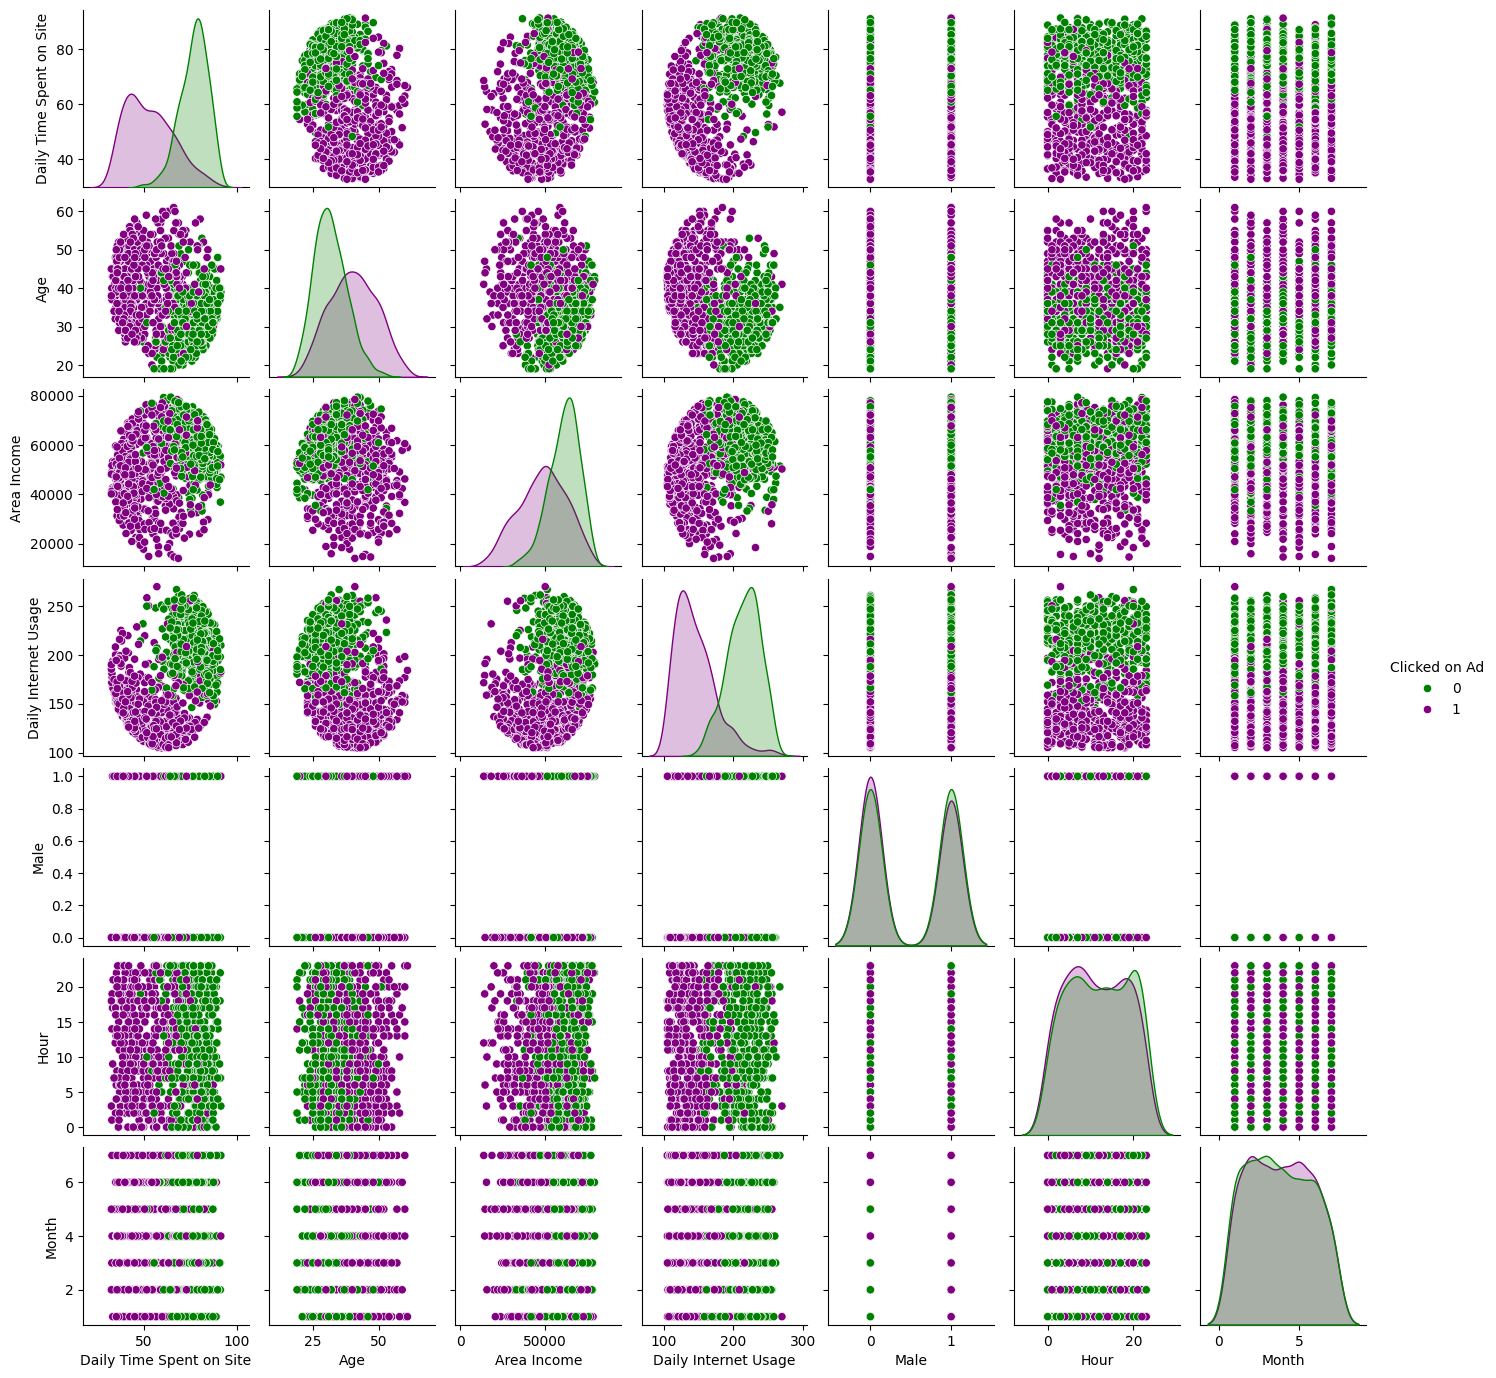

In [94]:
pal = ['green', 'purple']
sns.pairplot(ad_data, hue='Clicked on Ad', palette = pal, height=2)

In [96]:
#Check the Months for which we have data
ad_data['Month'].value_counts()

Month
2    160
3    156
4    147
1    147
5    147
6    142
7    101
Name: count, dtype: int64

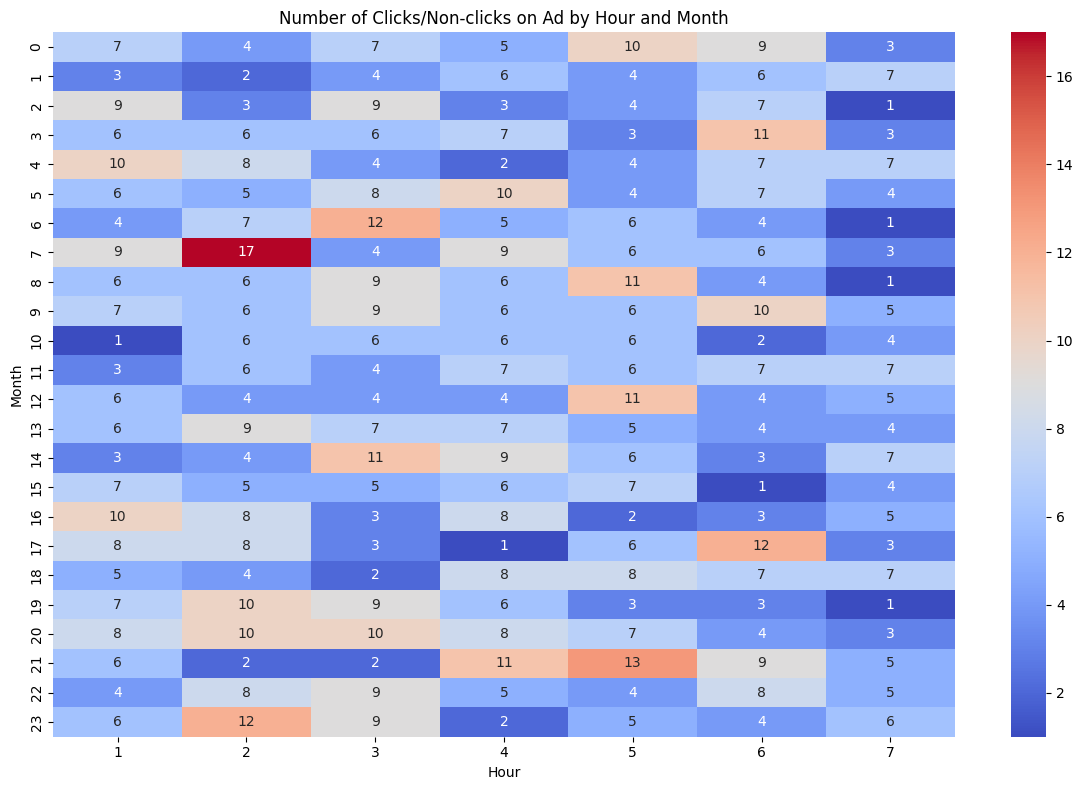

In [97]:
pivot_table = ad_data.pivot_table(index='Hour', columns='Month', values='Clicked on Ad', aggfunc='count')

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='coolwarm', annot=True, fmt='g')
plt.title('Number of Clicks/Non-clicks on Ad by Hour and Month')
plt.xlabel('Hour')
plt.ylabel('Month')
plt.tight_layout()

Temporal factors do not appear to exert significant influence on ad engagement. Instead, the primary determinant seems to be internet usage.

<Axes: xlabel='Age', ylabel='Count'>

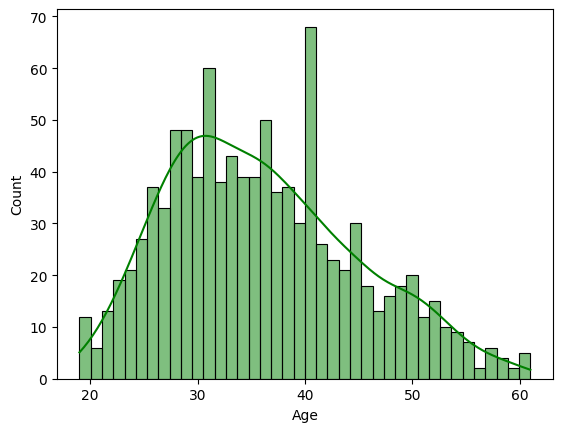

In [98]:
sns.histplot(data=ad_data, x='Age', bins=40, color='green', kde=True)

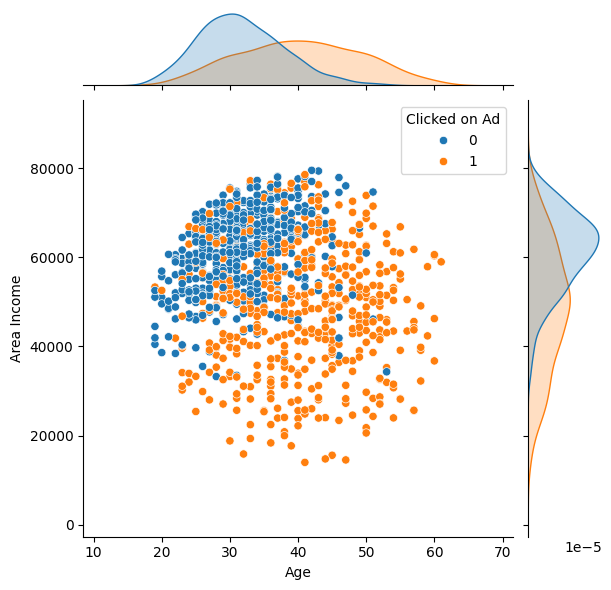

In [99]:
sns.jointplot(data=ad_data, x='Age', y='Area Income', hue='Clicked on Ad')

As observed in the preceding visualizations, the primary demographic appears to center around individuals in their thirties. Clicking on advertisements appears to be distributed across middle-aged individuals across various income brackets, clustering around the mean income level

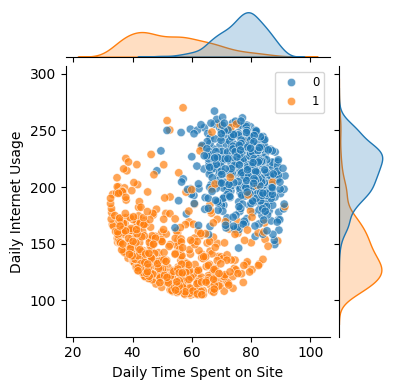

In [100]:
sns.jointplot(data=ad_data, x='Daily Time Spent on Site', y='Daily Internet Usage', hue='Clicked on Ad', color='green', alpha=0.7, height=4, legend=True)
plt.legend(fontsize='small')

Here, a notable distinction emerges between individuals who spend extended durations on the internet without subsequently clicking on an ad, compared to those spending less time on the site yet actively engaging with advertisements

Now let's split the data on Train and Test sets and set 'Clicked on Ad' as the target variable, given the numerous columns potentially influencing ad engagement.

In [147]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [148]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'Hour', 'Month']]
Y = ad_data['Clicked on Ad']

In [149]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.4)

In [150]:
logmodel = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
logmodel.fit(X_train,Y_train)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [151]:
predictions = logmodel.predict(X_test)

In [152]:

print(confusion_matrix(Y_test, predictions))
print('\n')
print(classification_report(Y_test, predictions))

[[184  14]
 [ 17 185]]


              precision    recall  f1-score   support

           0       0.92      0.93      0.92       198
           1       0.93      0.92      0.92       202

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



* True Positive (TP): 186 - The number of instances correctly classified as clicked on an ad.
* False Positive (FP): 12 - The number of instances incorrectly classified as clicked on an ad (actually did not click).
* False Negative (FN): 17 - The number of instances incorrectly classified as not clicked on an ad (actually clicked).
* True Negative (TN): 185 - The number of instances correctly classified as not clicked on an ad.

From the confusion matrix, it's evident that the model has performed well, with a relatively balanced distribution of correct and incorrect classifications. The number of false positives and false negatives is relatively low compared to the true positives and true negatives, indicating a favorable balance between precision and recall.

Furthermore, the confusion matrix reflects a balanced dataset, with 500 instances correctly classified as clicked on an ad and 500 instances correctly classified as not clicked on an ad. This balanced ratio between clicked and not clicked instances contributes to a more robust evaluation of the model's performance and enhances the reliability of its predictions.